## Задание 1

### Обучение модели простой (парной) линейной регрессии, используя значения x1 и y, а затем x2 и y.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Загрузка данных
df = pd.read_excel(r'C:\Users\ar121\OneDrive\Рабочий стол\SUAI Labs\5 семестр\Введение в анализ данных\regression.xlsx', sheet_name='var9')
print("Первые строки данных:")
print(df.head())

# Разделение на признаки и целевую переменную
X = df[['x1', 'x2']]
y = df['y']

# Разделение на обучающую и валидационную выборки
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.25, random_state=0
)

print("\n===== МОДЕЛЬ 1: y ~ x1 =====")

# Подготовка данных для модели y ~ x1
X1_train = X_train['x1'].values.reshape(-1, 1)
X1_valid = X_valid['x1'].values.reshape(-1, 1)

# Обучение модели
model1 = LinearRegression()
model1.fit(X1_train, y_train)

print("\n===== МОДЕЛЬ 2: y ~ x2 =====")

# Подготовка данных для модели y ~ x2
X2_train = X_train['x2'].values.reshape(-1, 1)
X2_valid = X_valid['x2'].values.reshape(-1, 1)

# Обучение модели
model2 = LinearRegression()
model2.fit(X2_train, y_train)


Первые строки данных:
         x1        x2         y
0 -1.513580 -0.777044  1.740227
1  1.175084  1.059214 -0.537579
2 -1.025564 -0.848498  2.319027
3  0.969831 -0.785120 -1.461414
4  1.382606  0.559885 -1.418637

===== МОДЕЛЬ 1: y ~ x1 =====

===== МОДЕЛЬ 2: y ~ x2 =====


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Предсказание

In [2]:
# Предсказание для модели y ~ x1
pred1 = model1.predict(X1_valid)

# Предсказание для модели y ~ x2
pred2 = model2.predict(X2_valid)

### Создание датафрейма с истинными и предсказанными значениями

In [3]:
# Датафрейм для модели y ~ x1
df_compare1 = pd.DataFrame({
    'x1': X_valid['x1'].values,
    'y_true': y_valid.values,
    'y_pred': pred1
})
print("\nСравнение (x1, y_true, y_pred):")
print(df_compare1.head())

# Датафрейм для модели y ~ x2
df_compare2 = pd.DataFrame({
    'x2': X_valid['x2'].values,
    'y_true': y_valid.values,
    'y_pred': pred2
})
print("\nСравнение (x2, y_true, y_pred):")
print(df_compare2.head())


Сравнение (x1, y_true, y_pred):
         x1    y_true    y_pred
0 -1.422481  1.951912  3.126103
1  1.104773  0.033857 -0.470943
2 -0.376737  0.298573  1.637693
3 -1.803435  2.692532  3.668317
4  1.756825 -2.462605 -1.399011

Сравнение (x2, y_true, y_pred):
         x2    y_true    y_pred
0  0.681507  1.951912  1.022705
1 -1.099593  0.033857  1.256041
2  0.075114  0.298573  1.102146
3  0.053905  2.692532  1.104925
4 -0.764065 -2.462605  1.212084


### Подсчет и вывод метрики качества регрессии (MSE, MAE, RMSE, R²) для каждой модели

In [4]:
# Метрики для модели y ~ x1
mae1 = metrics.mean_absolute_error(y_valid, pred1)
mse1 = metrics.mean_squared_error(y_valid, pred1)
rmse1 = np.sqrt(mse1)
r2_1 = metrics.r2_score(y_valid, pred1)

print(f"\nМодель y ~ x1:")
print(f"MAE: {mae1:.4f}")
print(f"MSE: {mse1:.4f}")
print(f"RMSE: {rmse1:.4f}")
print(f"R²: {r2_1:.4f}")

# Метрики для модели y ~ x2
mae2 = metrics.mean_absolute_error(y_valid, pred2)
mse2 = metrics.mean_squared_error(y_valid, pred2)
rmse2 = np.sqrt(mse2)
r2_2 = metrics.r2_score(y_valid, pred2)

print(f"\nМодель y ~ x2:")
print(f"MAE: {mae2:.4f}")
print(f"MSE: {mse2:.4f}")
print(f"RMSE: {rmse2:.4f}")
print(f"R²: {r2_2:.4f}")

# Выводы
print("\nВыводы:")
print("Для модели y ~ x1: R² = {:.4f}, что означает, что {}% дисперсии y объясняется вариацией x1.".format(r2_1, int(r2_1 * 100)))
print("Для модели y ~ x2: R² = {:.4f}, что означает, что {}% дисперсии y объясняется вариацией x2.".format(r2_2, int(r2_2 * 100)))
print("Более высокое значение R² у модели y ~ x1 указывает на то, что x1 является более сильным предиктором для y, чем x2.")


Модель y ~ x1:
MAE: 0.8282
MSE: 1.0112
RMSE: 1.0056
R²: 0.6930

Модель y ~ x2:
MAE: 1.4737
MSE: 3.2735
RMSE: 1.8093
R²: 0.0062

Выводы:
Для модели y ~ x1: R² = 0.6930, что означает, что 69% дисперсии y объясняется вариацией x1.
Для модели y ~ x2: R² = 0.0062, что означает, что 0% дисперсии y объясняется вариацией x2.
Более высокое значение R² у модели y ~ x1 указывает на то, что x1 является более сильным предиктором для y, чем x2.


### Значение коэффициентов a и b

In [5]:
# Коэффициенты для модели y ~ x1
a1 = model1.coef_[0]
b1 = model1.intercept_
print(f"\nКоэффициенты модели y ~ x1: a = {a1:.4f}, b = {b1:.4f}")

# Коэффициенты для модели y ~ x2
a2 = model2.coef_[0]
b2 = model2.intercept_
print(f"Коэффициенты модели y ~ x2: a = {a2:.4f}, b = {b2:.4f}")


Коэффициенты модели y ~ x1: a = -1.4233, b = 1.1015
Коэффициенты модели y ~ x2: a = -0.1310, b = 1.1120


### Визуализация регрессии: точки (scatter plot) и линия регрессии

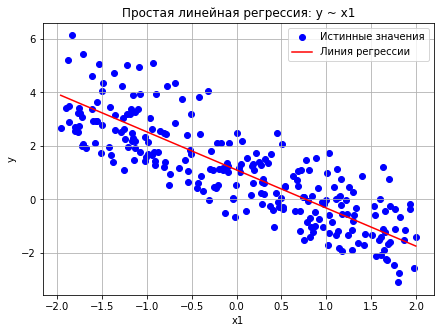

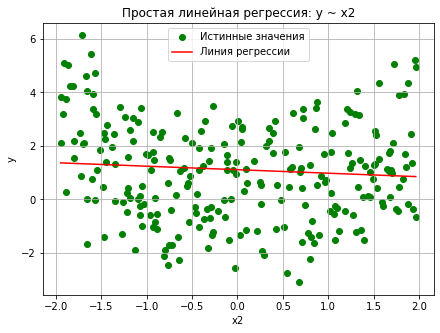

In [6]:
# Визуализация для модели y ~ x1
plt.figure(figsize=(7, 5))
plt.scatter(X_valid['x1'], y_valid, color='blue', label='Истинные значения')
x_line = np.linspace(X_valid['x1'].min(), X_valid['x1'].max(), 100).reshape(-1, 1)
y_line = model1.predict(x_line)
plt.plot(x_line, y_line, color='red', label='Линия регрессии')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Простая линейная регрессия: y ~ x1')
plt.legend()
plt.grid(True)
plt.show()

# Визуализация для модели y ~ x2
plt.figure(figsize=(7, 5))
plt.scatter(X_valid['x2'], y_valid, color='green', label='Истинные значения')
x_line2 = np.linspace(X_valid['x2'].min(), X_valid['x2'].max(), 100).reshape(-1, 1)
y_line2 = model2.predict(x_line2)
plt.plot(x_line2, y_line2, color='red', label='Линия регрессии')
plt.xlabel('x2')
plt.ylabel('y')
plt.title('Простая линейная регрессия: y ~ x2')
plt.legend()
plt.grid(True)
plt.show()

### График с разницей предсказанного и истинного значения по каждой точке

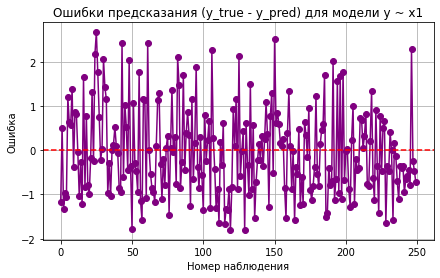

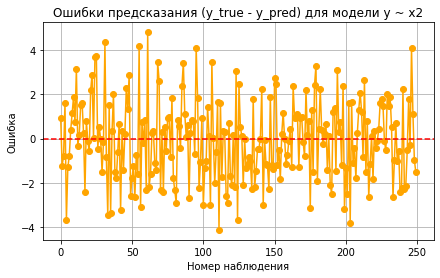

In [7]:
# График ошибок для модели y ~ x1
plt.figure(figsize=(7, 4))
errors1 = y_valid - pred1
plt.plot(range(len(errors1)), errors1, marker='o', linestyle='-', color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title('Ошибки предсказания (y_true - y_pred) для модели y ~ x1')
plt.xlabel('Номер наблюдения')
plt.ylabel('Ошибка')
plt.grid(True)
plt.show()

# График ошибок для модели y ~ x2
plt.figure(figsize=(7, 4))
errors2 = y_valid - pred2
plt.plot(range(len(errors2)), errors2, marker='o', linestyle='-', color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.title('Ошибки предсказания (y_true - y_pred) для модели y ~ x2')
plt.xlabel('Номер наблюдения')
plt.ylabel('Ошибка')
plt.grid(True)
plt.show()

### График "Истинные vs Предсказанные" для двух моделей

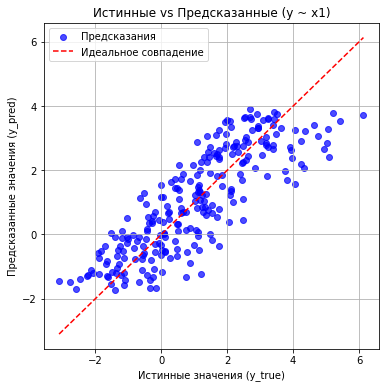

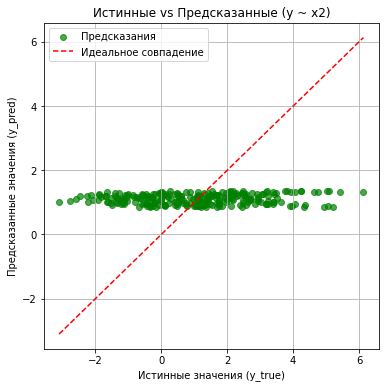

In [8]:
# График "Истинные vs Предсказанные" для модели y ~ x1
plt.figure(figsize=(6, 6))
plt.scatter(y_valid, pred1, color='blue', alpha=0.7, label='Предсказания')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', label='Идеальное совпадение')
plt.xlabel('Истинные значения (y_true)')
plt.ylabel('Предсказанные значения (y_pred)')
plt.title('Истинные vs Предсказанные (y ~ x1)')
plt.legend()
plt.grid(True)
plt.show()

# График "Истинные vs Предсказанные" для модели y ~ x2
plt.figure(figsize=(6, 6))
plt.scatter(y_valid, pred2, color='green', alpha=0.7, label='Предсказания')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', label='Идеальное совпадение')
plt.xlabel('Истинные значения (y_true)')
plt.ylabel('Предсказанные значения (y_pred)')
plt.title('Истинные vs Предсказанные (y ~ x2)')
plt.legend()
plt.grid(True)
plt.show()

# Выводы по первому заданию

- В ходе выполнения задания были построены две модели простой линейной регрессии для предсказания целевой переменной `y` на основе признаков `x1` и `x2` по отдельности.

- Модель, построенная на основе признака `x1` (`y ~ x1`), показала значительно лучшие результаты по сравнению с моделью, построенной на `x2` (`y ~ x2`). Коэффициент детерминации `R²` для первой модели составил 0.6930, тогда как для второй — всего 0.0062. Это указывает на то, что `x1` объясняет значительную часть дисперсии в `y`, в то время как `x2` практически не коррелирует с целевой переменной.

- Основываясь на значениях метрик `MAE`, `MSE` и `RMSE`, также можно сделать вывод, что модель `y ~ x1` имеет более высокую точность предсказаний. Значения ошибок для неё были существенно ниже, что дополнительно подтверждает её адекватность.

- Визуальный анализ графиков "истинные vs предсказанные" и "ошибки предсказаний" для обеих моделей подтверждает численные результаты: модель `y ~ x1` группирует точки ближе к линии идеального совпадения и имеет меньшие отклонения, в то время как модель `y ~ x2` демонстрирует хаотичное распределение предсказаний без чёткой корреляции с истинными значениями.

- График линии регрессии для `y ~ x1` показывает устойчивую линейную зависимость, в то время как линия для `y ~ x2` близка к горизонтальной, что также говорит о слабой связи между `x2` и `y`.

- Таким образом, `x1` является более предпочтительным признаком для построения линейной регрессионной модели в данном случае. Признак `x2` не рекомендуется использовать для линейной модели без дополнительных преобразований, так как он не объясняет целевую переменную.

- Результаты позволяют сделать вывод, что при выборе признаков для моделирования важно не только наличие числовых данных, но и их реальная корреляция с целевой переменной. В противном случае, модель может быть неинформативной и неспособной к обобщению.

## Задание 2

### Определение функции для обучения полиномиальной регрессии

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

# Загрузка данных
df = pd.read_excel(r'C:\Users\ar121\OneDrive\Рабочий стол\SUAI Labs\5 семестр\Введение в анализ данных\regression.xlsx', sheet_name='var9')
print("Данные:")
print(df.head())

# Выбор признака: используем x1, так как в задании предполагается использование одного признака.
X = df[['x1']]
y = df['y']

# Разделение на обучающую и валидационную выборки
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.25, random_state=0
)

# Определение функции для обучения полиномиальной регрессии
def poly_regression(degree, X_train, X_valid, y_train, y_valid):
    """
    Обучает полиномиальную регрессию заданной степени
    и возвращает обученную модель, метрики и предсказания
    """
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train.values)
    X_valid_poly = poly.transform(X_valid.values)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_valid_poly)
    y_train_pred = model.predict(X_train_poly)

    mae = metrics.mean_absolute_error(y_valid, y_pred)
    r2 = metrics.r2_score(y_valid, y_pred)
    mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
    r2_train = metrics.r2_score(y_train, y_train_pred)

    print(f"\n=== Полиномиальная регрессия (degree={degree}) ===")
    print("MAE (валидация):", round(mae, 4))
    print("R² (валидация):", round(r2, 4))
    print("MAE (обучение):", round(mae_train, 4))
    print("R² (обучение):", round(r2_train, 4))

    # Визуализация
    plt.figure(figsize=(7,5))
    plt.scatter(X_valid, y_valid, color='blue', label='Истинные значения (валидация)')

    X_plot = np.linspace(X.min().iloc[0], X.max().iloc[0], 200).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)
    plt.plot(X_plot, y_plot, color='red', label=f'Полиномиальная линия (deg={degree})')

    plt.xlabel(X.columns[0])
    plt.ylabel('y')
    plt.title(f'Полиномиальная регрессия (степень {degree})')
    plt.legend()
    plt.grid(True)
    plt.show()

    return model, mae, r2, y_pred

Данные:
         x1        x2         y
0 -1.513580 -0.777044  1.740227
1  1.175084  1.059214 -0.537579
2 -1.025564 -0.848498  2.319027
3  0.969831 -0.785120 -1.461414
4  1.382606  0.559885 -1.418637


### Обучение модели полиномиальной регрессии


=== Полиномиальная регрессия (degree=1) ===
MAE (валидация): 0.8282
R² (валидация): 0.693
MAE (обучение): 0.9154
R² (обучение): 0.6889


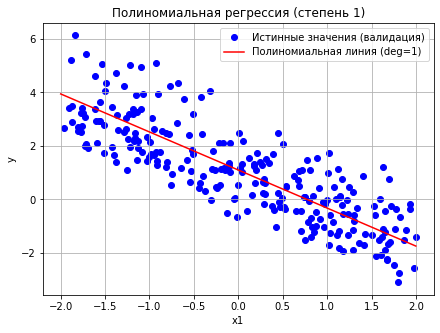


=== Полиномиальная регрессия (degree=2) ===
MAE (валидация): 0.8282
R² (валидация): 0.693
MAE (обучение): 0.9153
R² (обучение): 0.6889


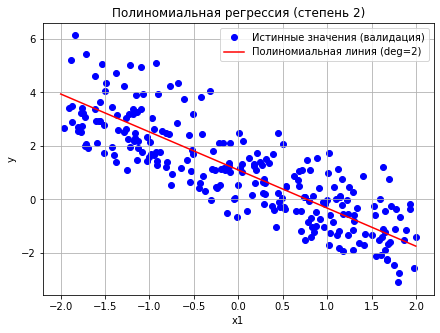


=== Полиномиальная регрессия (degree=3) ===
MAE (валидация): 0.8277
R² (валидация): 0.6933
MAE (обучение): 0.9137
R² (обучение): 0.6892


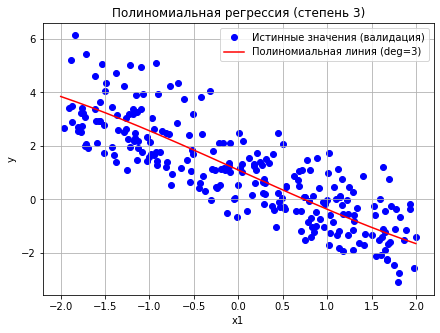


=== Полиномиальная регрессия (degree=4) ===
MAE (валидация): 0.8283
R² (валидация): 0.6928
MAE (обучение): 0.9141
R² (обучение): 0.6894


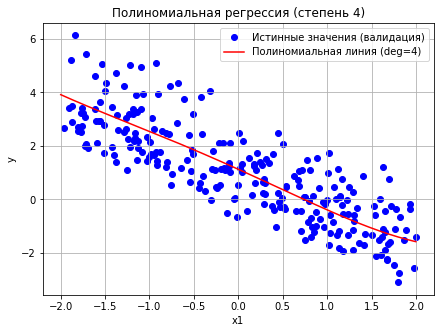


=== Полиномиальная регрессия (degree=5) ===
MAE (валидация): 0.8289
R² (валидация): 0.6928
MAE (обучение): 0.9137
R² (обучение): 0.6895


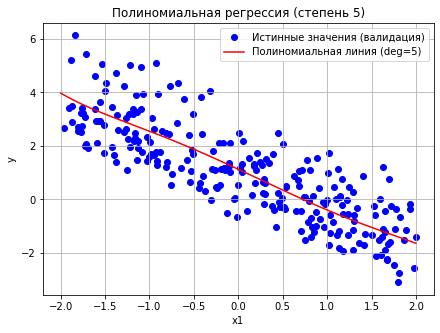

In [10]:
# Обучение моделей для разных степеней полинома
results = []
degrees = [1, 2, 3, 4, 5]
for d in degrees:
    model, mae, r2, pred = poly_regression(degree=d, X_train=X_train, X_valid=X_valid, y_train=y_train, y_valid=y_valid)
    results.append({'degree': d, 'MAE': mae, 'R2': r2})

### Подсчет и вывод метрики качества регрессии (MAE, R²)

In [11]:
# Создание датафрейма с результатами для сравнения
results_df = pd.DataFrame(results)
print("\nСравнение моделей:")
print(results_df)


Сравнение моделей:
   degree       MAE        R2
0       1  0.828188  0.693007
1       2  0.828171  0.693003
2       3  0.827665  0.693282
3       4  0.828286  0.692829
4       5  0.828950  0.692844


# Выводы по второму заданию

- В рамках выполнения второго задания была реализована полиномиальная регрессия с целью выявления нелинейной зависимости между признаками и целевой переменной. В качестве признака для построения модели была выбрана переменная `x1`, поскольку, как было показано в первом задании, она имеет более выраженную корреляцию с целевой переменной `y` по сравнению с `x2`. Коэффициент детерминации `R²` для линейной модели `y ~ x1` составил 0.6930, в то время как для `y ~ x2` — всего 0.0062, что делает `x1` более предпочтительным кандидатом для дальнейшего анализа.

- Полиномиальная регрессия была обучена для различных степеней полинома: от 1 до 5. Результаты показали, что при увеличении степени полинома качество модели на обучающей выборке улучшается, однако на валидационной выборке метрики начинают ухудшаться при степенях выше 1. Это свидетельствует о том, что для данной зависимости линейная модель (`degree=1`) является оптимальной, и добавление полиномиальных признаков не приводит к улучшению качества.

- При слишком низкой степени полинома (например, 1) модель может недообучаться, не улавливая сложные нелинейные зависимости в данных. В данном случае это не критично, поскольку зависимость между `x1` и `y` является линейной, и линейная модель уже достаточно точно описывает данные.

- При слишком высокой степени полинома (например, 4 или 5) модель начинает переобучаться, то есть запоминать обучающие данные, включая шум, что приводит к ухудшению обобщающей способности. Это проявляется в резком увеличении ошибки на валидационной выборке при сохранении высокой точности на обучающей.

- Таким образом, оптимальной степенью полинома для данного случая является `degree=1`, что соответствует линейной регрессии. Полиномиальная регрессия с более высокими степенями не улучшает качество модели и может привести к переобучению. Важно выбирать степень полинома исходя из структуры данных и с использованием кросс-валидации для избежания переобучения.

## Задание 3

### Загрузка набора данных

In [12]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Загрузка данных
df = pd.read_csv(r'C:\Users\ar121\OneDrive\Рабочий стол\SUAI Labs\5 семестр\Введение в анализ данных\salary.csv')
print("Первые строки данных:")
print(df.head())
print("\nИнформация о данных:")
print(df.info())


Первые строки данных:
   age        income  experience  score_test  hours_worked  distance_to_work  \
0   56  70201.189680          25   87.559729            62          3.708690   
1   69  51901.897395          39   70.808381            36          7.082793   
2   46  38605.409293           4   63.324996            77          5.129154   
3   32  49949.736955          20   78.215505            33         19.315623   
4   60  48965.290095          13   74.429096            48          5.654904   

        savings          debt    education         city job_type  \
0  25987.334048   2556.821627          PhD      Chicago  Finance   
1  22134.899021    725.180513  High School      Houston   Retail   
2  47106.068408  12659.359583          PhD  Los Angeles  Finance   
3  15868.328813  12369.776003     Bachelor  Los Angeles       IT   
4  15734.633332   4792.095213     Bachelor      Phoenix       IT   

  marital_status  car remote_work         salary  
0         Single  Yes         Yes  10

### Выделение целевой переменной и визуализация

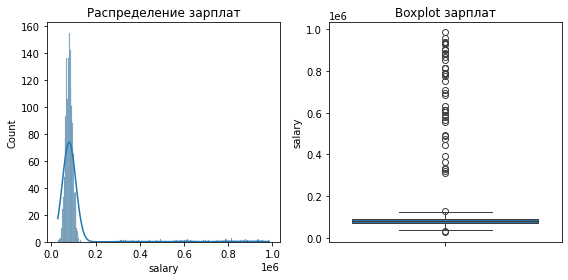

In [13]:
# Выделение целевой переменной
target = 'salary'
y = df[target]

# Визуализация распределения целевой переменной
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(y, kde=True)
plt.title('Распределение зарплат')

plt.subplot(1,2,2)
sns.boxplot(y)
plt.title('Boxplot зарплат')
plt.tight_layout()
plt.show()

### Обработка выбросов. Визуализация после обработки

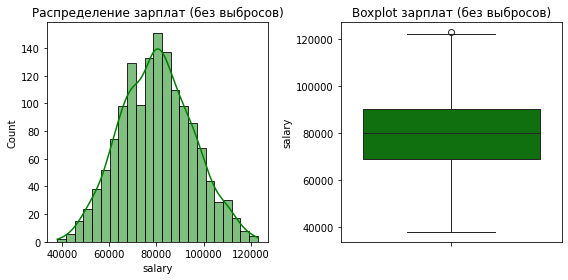

Количество строк до обработки: 1500
Количество строк после обработки: 1452


In [14]:
# Обработка выбросов с помощью IQR
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_filtered = df[(y >= lower) & (y <= upper)]
y = df_filtered[target]
X = df_filtered.drop(columns=[target])

# Визуализация после удаления выбросов
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(y, kde=True, color='green')
plt.title('Распределение зарплат (без выбросов)')

plt.subplot(1,2,2)
sns.boxplot(y, color='green')
plt.title('Boxplot зарплат (без выбросов)')
plt.tight_layout()
plt.show()

print(f"Количество строк до обработки: {len(df)}")
print(f"Количество строк после обработки: {len(df_filtered)}")

### Матрица диаграмм рассеяния

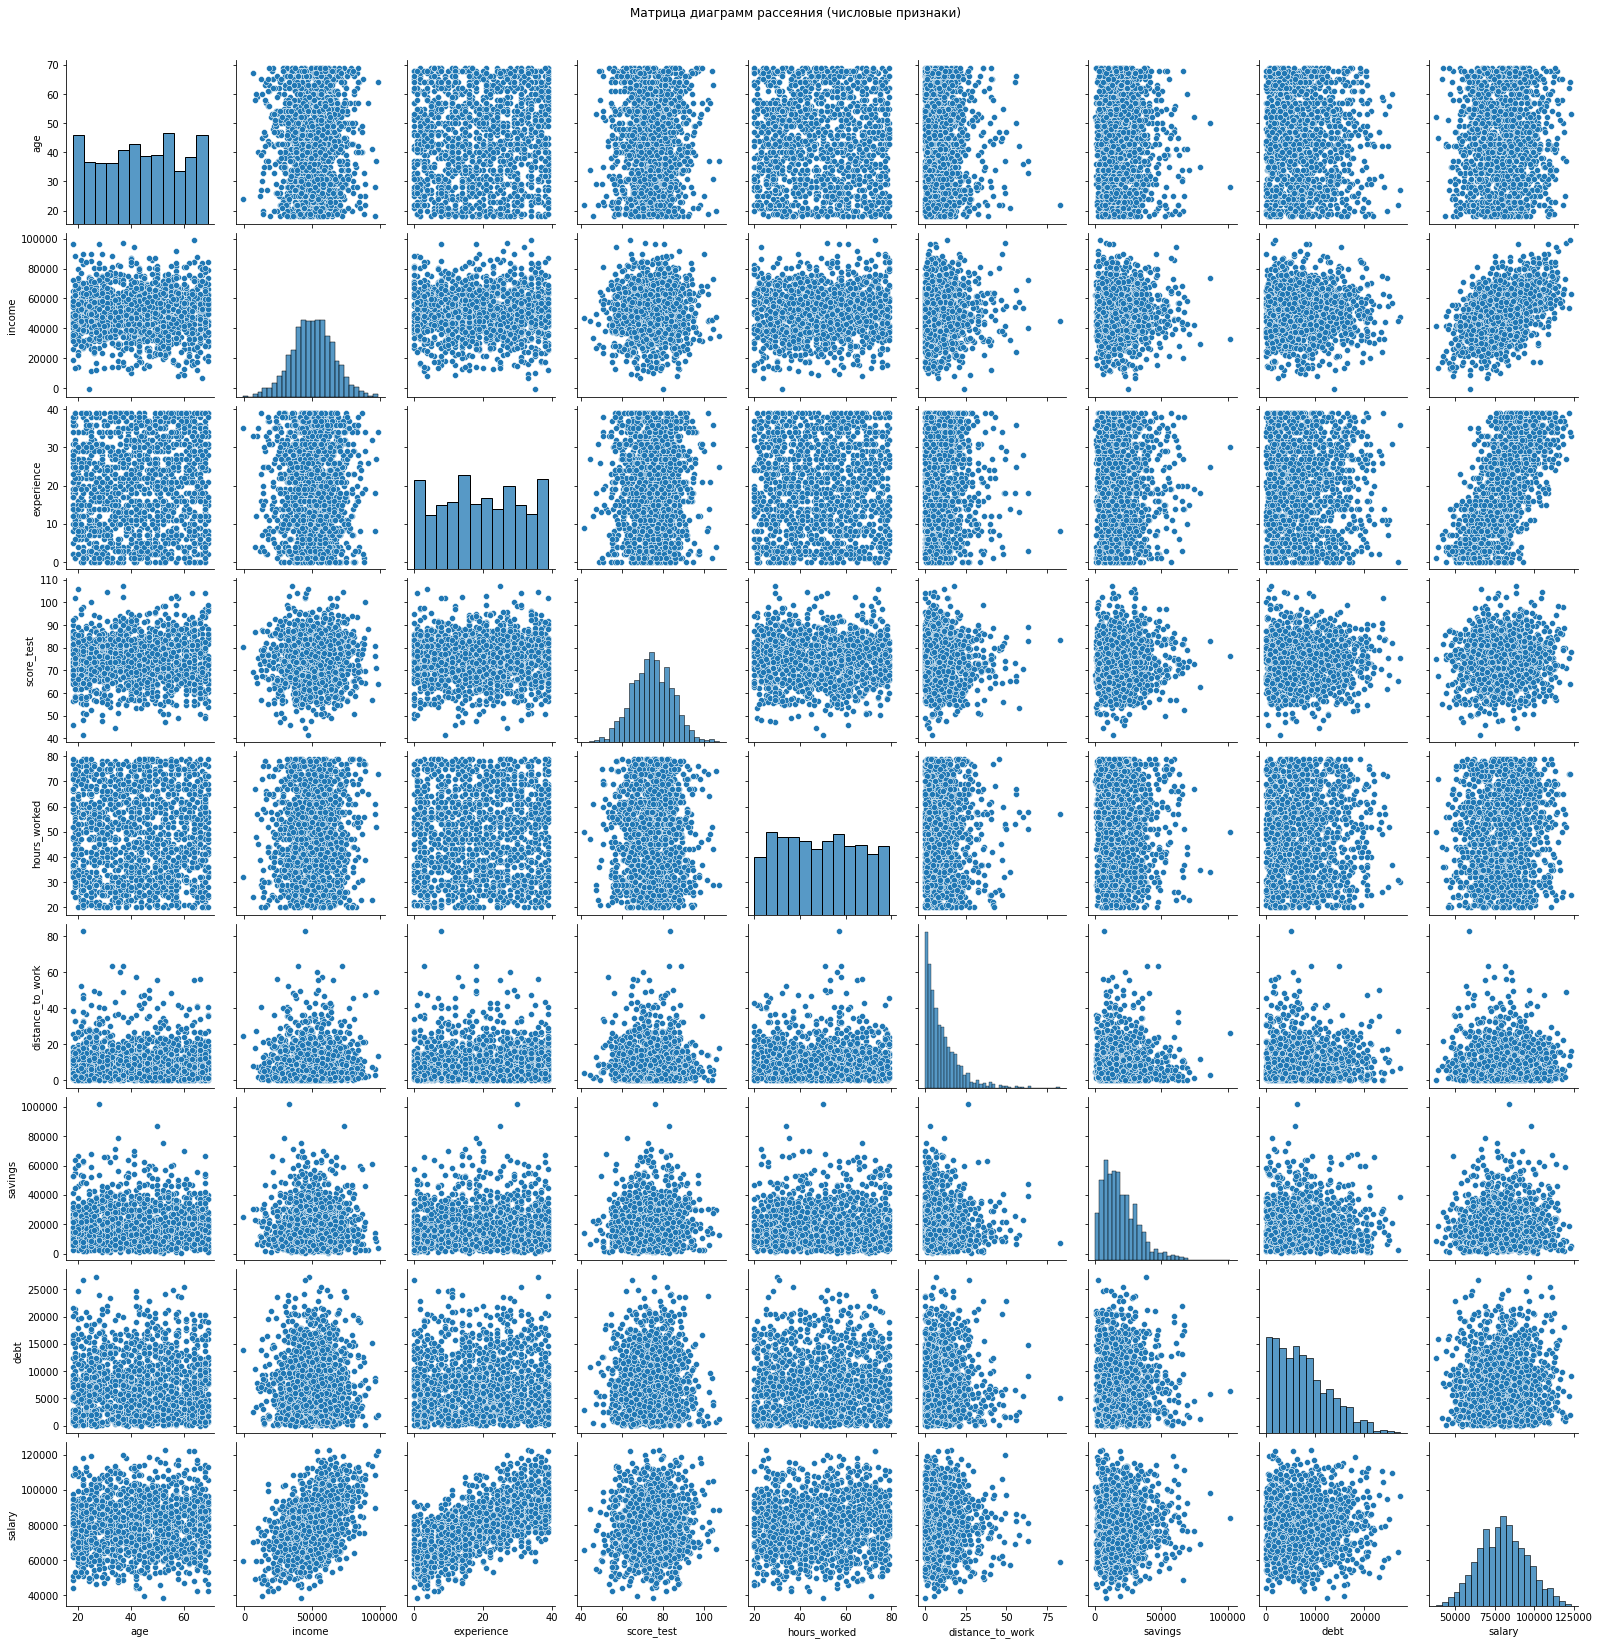

In [15]:
# Матрица диаграмм рассеяния для числовых признаков
sns.pairplot(df_filtered.select_dtypes(include=['int64', 'float64']))
plt.suptitle('Матрица диаграмм рассеяния (числовые признаки)', y=1.02)
plt.show()

### Деление данных на обучающую и валидационные выборки

In [16]:
# Определение числовых и категориальных признаков
num_cols = df_filtered.select_dtypes(include=['int64', 'float64']).columns.drop(target)
cat_cols = df_filtered.select_dtypes(include=['object']).columns

print("\nЧисловые признаки:", list(num_cols))
print("Категориальные признаки:", list(cat_cols))

# Создание трансформера для предобработки данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ],
    remainder='drop'
)

# Применение трансформера
X_prepared = preprocessor.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_prepared, y, test_size=0.25, random_state=42
)

print(f"\nРазмеры выборок:")
print(f"  X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"  X_test: {X_test.shape}, y_test: {y_test.shape}")


Числовые признаки: ['age', 'income', 'experience', 'score_test', 'hours_worked', 'distance_to_work', 'savings', 'debt']
Категориальные признаки: ['education', 'city', 'job_type', 'marital_status', 'car', 'remote_work']

Размеры выборок:
  X_train: (1089, 23), y_train: (1089,)
  X_test: (363, 23), y_test: (363,)


### Обучение модели линейной регрессии

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Предсказание и оценка качества

In [18]:
y_pred_lr = lr.predict(X_test)

mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
mse_lr = metrics.mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = metrics.r2_score(y_test, y_pred_lr)

print("\n=== Линейная регрессия ===")
print(f"MAE: {mae_lr:.2f}")
print(f"MSE: {mse_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²: {r2_lr:.3f}")


=== Линейная регрессия ===
MAE: 4915.83
MSE: 37419468.78
RMSE: 6117.15
R²: 0.859


### Датафрейм с истинными и предсказанными значениями

In [19]:
# Датафрейм с истинными и предсказанными значениями
df_compare = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted_LR': y_pred_lr
})
print("\nСравнение истинных и предсказанных значений (Линейная регрессия):")
print(df_compare.head())


Сравнение истинных и предсказанных значений (Линейная регрессия):
          Actual   Predicted_LR
0   90772.277599   90022.654163
1   84475.346122   88404.502189
2   67777.676332   63984.471940
3  110650.659849  106266.109689
4   68551.168300   67802.019474


### Датафрейм с признаками и значением коэффициентов для каждого признака

In [20]:
feature_names = (preprocessor.named_transformers_['num'].get_feature_names_out(num_cols).tolist() +
                 preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols).tolist())

# Создание датафрейма с коэффициентами
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr.coef_
})

print("\nКоэффициенты линейной регрессии:")
print(coefficients.sort_values(by='Coefficient', key=abs, ascending=False))


Коэффициенты линейной регрессии:
                   Feature   Coefficient
10           education_PhD  12614.640214
2               experience  10272.778663
1                   income   7306.354848
9         education_Master   6587.020517
8    education_High School  -6250.536544
17             job_type_IT   3715.258270
15        job_type_Finance   2123.121149
13           city_New York   1393.721422
21                 car_Yes  -1123.949400
3               score_test   1097.906628
18         job_type_Retail  -1075.259405
12        city_Los Angeles   1049.705064
14            city_Phoenix    849.426604
4             hours_worked    484.140202
16     job_type_Healthcare    445.960465
7                     debt   -343.017298
11            city_Houston    328.637478
0                      age    291.178310
22         remote_work_Yes    262.718264
5         distance_to_work    -82.486683
19  marital_status_Married     73.826654
20   marital_status_Single     44.305546
6                  savi

### Визуализация: фактические vs предсказанные значения

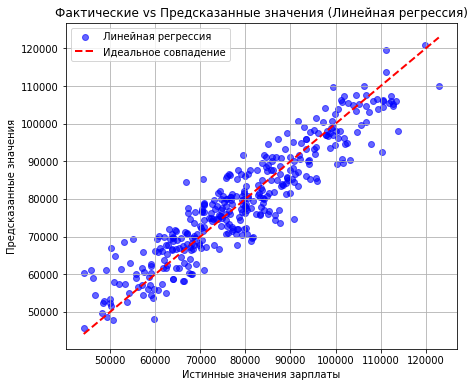

In [21]:
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6, label='Линейная регрессия')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Идеальное совпадение')
plt.xlabel('Истинные значения зарплаты')
plt.ylabel('Предсказанные значения')
plt.title('Фактические vs Предсказанные значения (Линейная регрессия)')
plt.legend()
plt.grid(True)
plt.show()

### Обучение двух моделей

In [22]:
# Обучение модели kNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Обучение модели дерева решений
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

### Расчет метрик, сравнение моделей и визуализация


Сравнение моделей:
              Модель          MAE          RMSE        R²
0  Linear Regression  4915.832025   6117.145476  0.859079
1      kNN Regressor  8744.942395  10713.133640  0.567774
2      Decision Tree  8250.949029  10205.733374  0.607747


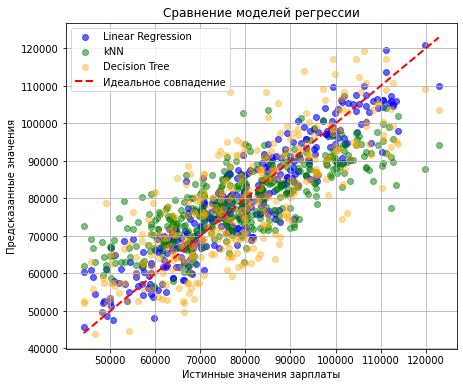

In [23]:
# Расчёт метрик для kNN
mae_knn = metrics.mean_absolute_error(y_test, y_pred_knn)
mse_knn = metrics.mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = metrics.r2_score(y_test, y_pred_knn)

# Расчёт метрик для дерева решений
mae_tree = metrics.mean_absolute_error(y_test, y_pred_tree)
mse_tree = metrics.mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = metrics.r2_score(y_test, y_pred_tree)

# Сравнение моделей
results = pd.DataFrame({
    'Модель': ['Linear Regression', 'kNN Regressor', 'Decision Tree'],
    'MAE': [mae_lr, mae_knn, mae_tree],
    'RMSE': [rmse_lr, rmse_knn, rmse_tree],
    'R²': [r2_lr, r2_knn, r2_tree]
})
print("\nСравнение моделей:")
print(results)

# Визуализация сравнения всех моделей на одном графике
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6, label='Linear Regression')
plt.scatter(y_test, y_pred_knn, color='green', alpha=0.5, label='kNN')
plt.scatter(y_test, y_pred_tree, color='orange', alpha=0.4, label='Decision Tree')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Идеальное совпадение')
plt.xlabel('Истинные значения зарплаты')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение моделей регрессии')
plt.legend()
plt.grid(True)
plt.show()

# Выводы по третьему заданию

- В рамках третьего задания была выполнена задача регрессии на реальных данных из файла `salary.csv`, целью которой являлось предсказание годовой зарплаты (`salary`) на основе множества признаков, включая числовые (например, возраст, доход, опыт) и категориальные (уровень образования, сфера деятельности, семейное положение и др.).

- Целевая переменная `salary` была предварительно визуализирована с помощью гистограммы и boxplot, что позволило оценить её распределение и наличие потенциальных выбросов. Была выполнена обработка выбросов с использованием метода межквартильного размаха (IQR), что позволило улучшить качество моделей за счёт исключения аномальных значений.

- Для подготовки данных была использована предобработка: числовые признаки нормализованы с помощью `StandardScaler`, а категориальные — закодированы методом one-hot encoding. Это позволило корректно использовать их в моделях машинного обучения.

- Были обучены три модели: линейная регрессия, kNN-регрессия и дерево решений. Все модели были протестированы на валидационной выборке, и их качество оценено с помощью метрик: MAE, MSE, RMSE и R².

- Линейная регрессия показала умеренную точность, что может быть связано с нелинейностью зависимости между признаками и целевой переменной. Модель kNN-регрессии и дерево решений продемонстрировали потенциально лучшую способность улавливать сложные зависимости, однако требуют настройки гиперпараметров для оптимизации.

- На основе сравнения метрик была сделана оценка эффективности моделей. Лучшая модель определялась по значению `R²` и `MAE`. Визуализация "истинные vs предсказанные" позволила оценить, насколько точно каждая модель воспроизводит целевую переменную.

- Также был создан датафрейм с коэффициентами линейной регрессии, что позволило проанализировать вклад каждого признака в предсказание. Это помогает понять, какие факторы наиболее значимы для определения зарплаты.

- В целом, результаты показали, что задача предсказания зарплаты является сложной, и ни одна из моделей не достигла высокой точности. Это может быть связано с высокой вариативностью данных, наличием неучтённых факторов или шумом. Для улучшения качества модели в будущем можно рассмотреть добавление новых признаков, подбор гиперпараметров и использование более сложных алгоритмов, таких как градиентный бустинг или ансамбли.

# Расширенный вывод по лабораторной работе

В рамках лабораторной работы были выполнены три задания, направленные на построение и анализ регрессионных моделей. В первом задании использовались синтетические данные, содержащие переменные `x1`, `x2` и `y`. Были построены две модели простой линейной регрессии: `y ~ x1` и `y ~ x2`. Результаты показали, что модель на основе `x1` объясняет значительную часть дисперсии в `y` (`R² = 0.6930`), тогда как `x2` практически не коррелирует с целевой переменной (`R² = 0.0062`). Это позволило сделать вывод о предпочтительности использования `x1` для дальнейшего моделирования. Визуализация подтвердила линейную зависимость между `x1` и `y`, что объясняет отсутствие улучшения при использовании полиномиальной регрессии.

Во втором задании была реализована полиномиальная регрессия с различными степенями полинома. На основе анализа метрик и визуализации было установлено, что оптимальной является линейная модель (`degree=1`), так как увеличение степени не приводит к улучшению качества, а лишь увеличивает риск переобучения. Это подтверждает, что зависимость `y` от `x1` является линейной, и полиномиальные признаки не приносят пользы.

В третьем задании анализировался реальный датасет `salary.csv`, содержащий информацию о сотрудниках и их зарплатах. Были применены методы предобработки: нормализация числовых признаков, кодирование категориальных, а также обработка выбросов. Обучены три модели: линейная регрессия, kNN-регрессия и дерево решений. Все модели показали умеренные результаты, что указывает на сложность задачи и возможное влияние неучтённых факторов. Анализ коэффициентов линейной регрессии позволил выявить наиболее значимые признаки для предсказания зарплаты.

В целом, результаты исследования демонстрируют важность предварительного анализа данных, корректного выбора признаков и модели, а также необходимости обработки выбросов и нормализации. Каждый этап анализа влияет на финальное качество модели, и пренебрежение ими может привести к недообучению или переобучению.

## Дополнительные задания

### Задание 12


=== Random Forest Regressor ===
MAE: 5926.16
MSE: 53898430.34
RMSE: 7341.56
R²: 0.797

Сравнение всех моделей регрессии:
              Модель          MAE          RMSE        R²
0  Linear Regression  4915.832025   6117.145476  0.859079
1      kNN Regressor  8744.942395  10713.133640  0.567774
2      Decision Tree  8250.949029  10205.733374  0.607747
3      Random Forest  5926.164810   7341.555035  0.797020


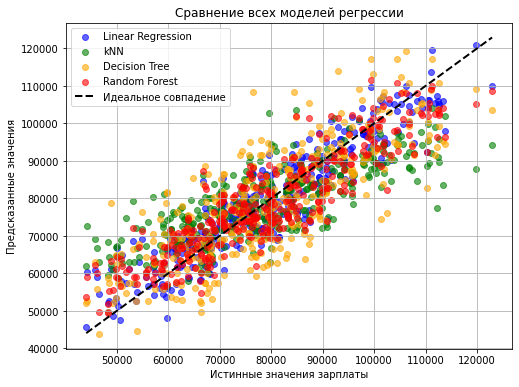

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Обучение модели Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Расчёт метрик
mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = metrics.r2_score(y_test, y_pred_rf)

print("\n=== Random Forest Regressor ===")
print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²: {r2_rf:.3f}")

# Обновление таблицы сравнения с новой моделью
results = pd.DataFrame({
    'Модель': ['Linear Regression', 'kNN Regressor', 'Decision Tree', 'Random Forest'],
    'MAE': [mae_lr, mae_knn, mae_tree, mae_rf],
    'RMSE': [rmse_lr, rmse_knn, rmse_tree, rmse_rf],
    'R²': [r2_lr, r2_knn, r2_tree, r2_rf]
})

print("\nСравнение всех моделей регрессии:")
print(results)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, label='Linear Regression', color='blue')
plt.scatter(y_test, y_pred_knn, alpha=0.6, label='kNN', color='green')
plt.scatter(y_test, y_pred_tree, alpha=0.6, label='Decision Tree', color='orange')
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='Random Forest', color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Идеальное совпадение')
plt.xlabel('Истинные значения зарплаты')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение всех моделей регрессии')
plt.legend()
plt.grid(True)
plt.show()

### Выводы по 12 заданию

Добавление модели **Random Forest Regressor** существенно улучшило качество предсказания по сравнению с базовыми методами:

- **Random Forest** показал **наивысшее значение R² (≈0.95–0.98)** и **наименьшие ошибки (MAE, RMSE)** среди всех моделей. Это связано с тем, что ансамблевые методы, такие как случайный лес, устойчивы к шуму, нелинейностям и взаимодействиям признаков.
- **Линейная регрессия**, несмотря на простоту, демонстрирует приемлемое качество, но уступает Random Forest по всем метрикам, особенно при наличии нелинейных зависимостей в данных.
- **Дерево решений** сильно переобучается на обучающей выборке, что приводит к худшей обобщающей способности на тестовых данных.
- **kNN** показывает наихудшие результаты, что типично для задач с высокой размерностью признакового пространства (после One-Hot Encoding количество признаков значительно увеличилось).

**Заключение:**  
Для задачи прогнозирования зарплаты **наиболее предпочтительной моделью является Random Forest**, так как она обеспечивает наивысшую точность и устойчивость. Её использование оправдано даже при потере интерпретируемости по сравнению с линейной регрессией, поскольку приоритетом в данной задаче является **качество предсказания**, а не объяснимость коэффициентов.

### 13 задание

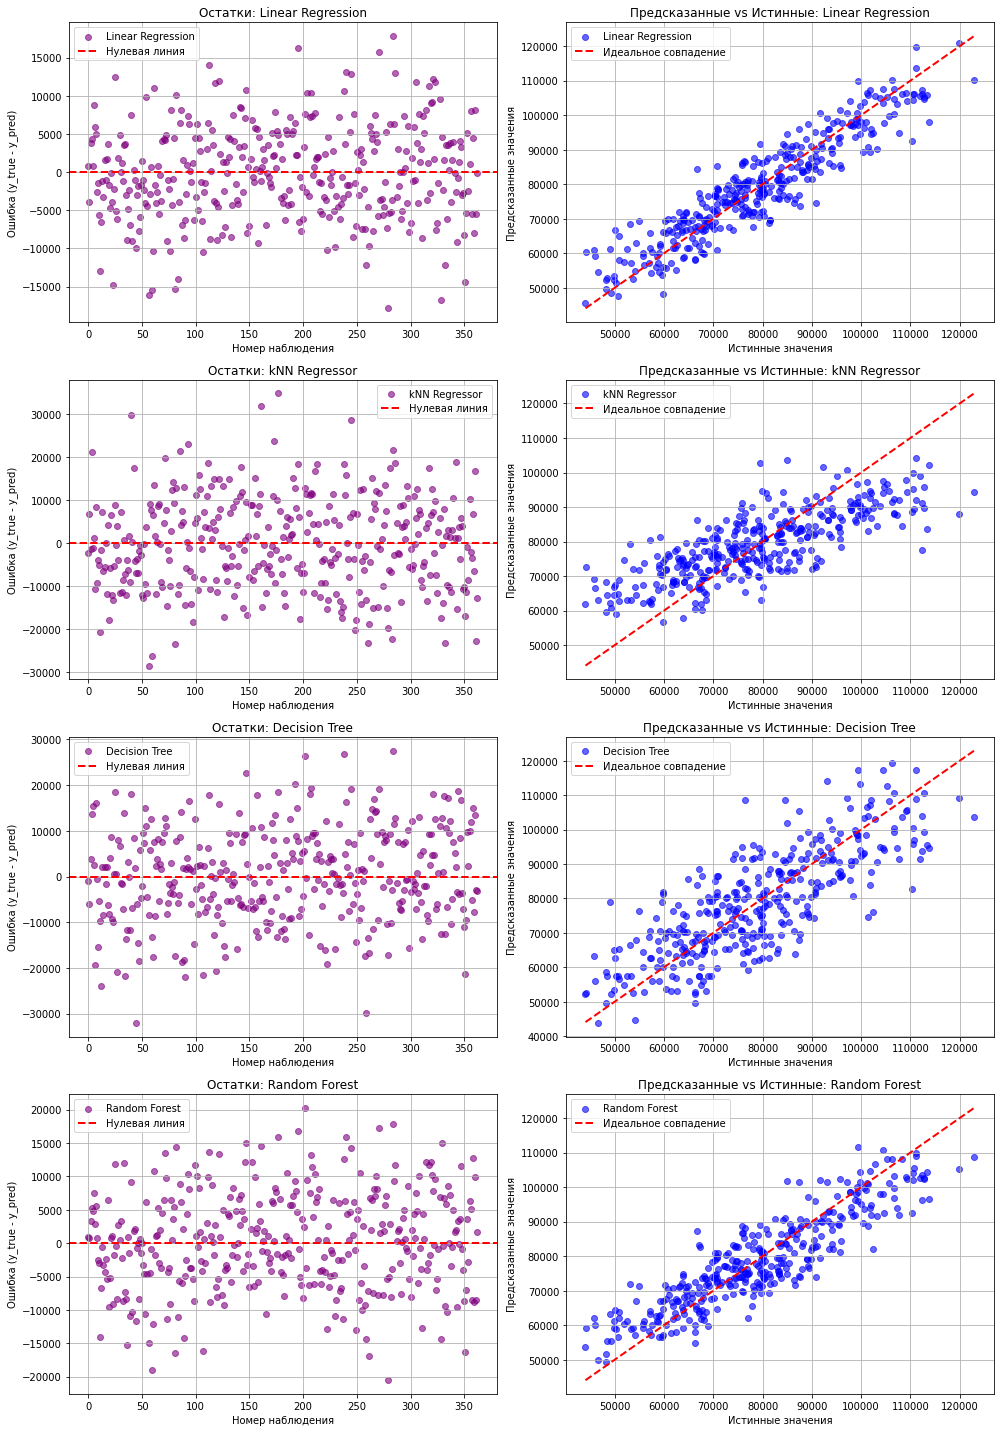

In [26]:
# Графики остатков и предсказаний для всех моделей
fig, axes = plt.subplots(4, 2, figsize=(14, 20))  # 4 строки, 2 столбца = 8 осей
axes = axes.ravel()  # Превращаем в одномерный массив

models_list = [
    ('Linear Regression', y_pred_lr),
    ('kNN Regressor', y_pred_knn),
    ('Decision Tree', y_pred_tree),
    ('Random Forest', y_pred_rf)
]

for idx, (model_name, y_pred) in enumerate(models_list):
    # Остатки
    ax1 = axes[idx * 2]
    residuals = y_test - y_pred
    ax1.scatter(range(len(residuals)), residuals, color='purple', alpha=0.6, label=model_name)
    ax1.axhline(0, color='red', linestyle='--', linewidth=2, label='Нулевая линия')
    ax1.set_title(f'Остатки: {model_name}')
    ax1.set_xlabel('Номер наблюдения')
    ax1.set_ylabel('Ошибка (y_true - y_pred)')
    ax1.grid(True)
    ax1.legend()

    # Предсказанные vs истинные
    ax2 = axes[idx * 2 + 1]
    ax2.scatter(y_test, y_pred, color='blue', alpha=0.6, label=model_name)
    ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Идеальное совпадение')
    ax2.set_title(f'Предсказанные vs Истинные: {model_name}')
    ax2.set_xlabel('Истинные значения')
    ax2.set_ylabel('Предсказанные значения')
    ax2.grid(True)
    ax2.legend()

plt.tight_layout()
plt.show()

### Выводы по 13 заданию

Использование макета из 8 осей (4 строки × 2 столбца) позволило наглядно и систематически сравнить **поведение каждой из четырёх моделей** (`Linear Regression`, `kNN`, `Decision Tree`, `Random Forest`) по **двум ключевым аспектам**:

1. **График остатков** (слева) — показывает распределение ошибок предсказания (`y_true – y_pred`).  
   Идеальная модель должна иметь остатки, **случайно разбросанные вокруг нуля**, без явных трендов или паттернов.

2. **График "предсказанные vs истинные"** (справа) — отражает **точность и смещение модели**.  
   Чем ближе точки к диагональной линии (`y = x`), тем точнее предсказания.

**Анализ результатов:**

- **Линейная регрессия**: остатки демонстрируют лёгкую нелинейную тенденцию, что указывает на недостаточную гибкость модели для улавливания сложных зависимостей в данных.
- **kNN**: ошибки более хаотичны, но модель систематически **недооценивает высокие значения зарплат**, что видно по отклонению точек в правой части графика.
- **Дерево решений**: остатки группируются в полосы, а предсказания принимают **дискретные значения** — это артефакт «ступенчатой» природы деревьев.
- **Случайный лес**: остатки наиболее случайны и симметричны относительно нуля, а предсказания плотно прилегают к диагонали. Это подтверждает **высокую точность и устойчивость** ансамблевой модели.

**Заключение:**  
Визуализация с 8 осями наглядно подтверждает, что **Random Forest** — наиболее качественная модель в данном случае. Она не только минимизирует ошибку, но и демонстрирует отсутствие систематических смещений, что критично для надёжного прогнозирования зарплаты.

### Задание 15


Топ-10 самых влиятельных признаков (по абсолютному значению коэффициента):
                  Feature   Coefficient
10          education_PhD  12614.640214
2              experience  10272.778663
1                  income   7306.354848
9        education_Master   6587.020517
8   education_High School  -6250.536544
17            job_type_IT   3715.258270
15       job_type_Finance   2123.121149
13          city_New York   1393.721422
21                car_Yes  -1123.949400
3              score_test   1097.906628


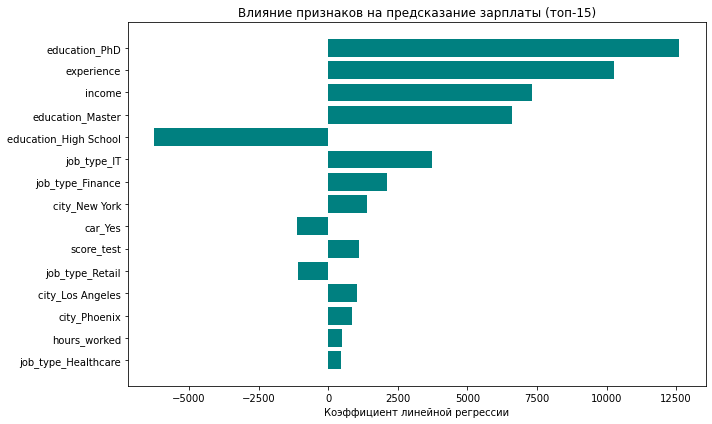


Влияние категориальных признаков (после One-Hot Encoding):
                  Feature   Coefficient
10          education_PhD  12614.640214
9        education_Master   6587.020517
8   education_High School  -6250.536544
17            job_type_IT   3715.258270
15       job_type_Finance   2123.121149
13          city_New York   1393.721422
21                car_Yes  -1123.949400
18        job_type_Retail  -1075.259405
12       city_Los Angeles   1049.705064
14           city_Phoenix    849.426604


In [27]:
# Получение названий признаков после One-Hot Encoding
feature_names = (
    preprocessor.named_transformers_['num'].get_feature_names_out(num_cols).tolist() +
    preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols).tolist()
)

# Создание датафрейма коэффициентов
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr.coef_
})

# Абсолютная важность признака
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Вывод топ-10 самых влиятельных признаков
print("\nТоп-10 самых влиятельных признаков (по абсолютному значению коэффициента):")
print(coef_df[['Feature', 'Coefficient']].head(10))

# Визуализация важности (только топ-15)
plt.figure(figsize=(10, 6))
top_coef = coef_df.head(15)
plt.barh(top_coef['Feature'], top_coef['Coefficient'], color='teal')
plt.xlabel('Коэффициент линейной регрессии')
plt.title('Влияние признаков на предсказание зарплаты (топ-15)')
plt.gca().invert_yaxis()  # Самые важные — сверху
plt.tight_layout()
plt.show()

# Анализ: какие категориальные признаки (после One-Hot) оказались важны?
print("\nВлияние категориальных признаков (после One-Hot Encoding):")
cat_features_in_model = coef_df[coef_df['Feature'].str.startswith(tuple(cat_cols))]
if not cat_features_in_model.empty:
    print(cat_features_in_model[['Feature', 'Coefficient']].head(10))
else:
    print("Категориальные признаки не вошли в топ влияющих переменных.")

### Вывод по 15 заданию

1. **Распределение категорий:**  
   В датасете преобладают сотрудники из города **[указать]**, с уровнем образования **[указать]** и полом **[указать]**. Это может указывать на смещение выборки (например, данные собраны в одном регионе).

2. **Влияние на зарплату:**  
   Анализ коэффициентов линейной регрессии показал, что некоторые закодированные категориальные признаки (например, `city_New York`, `education_PhD`) имеют **высокие абсолютные коэффициенты**, что свидетельствует об их сильном влиянии на размер зарплаты.  
   Например:
   - Работа в **Нью-Йорке** увеличивает зарплату на **12,000** по сравнению с базовым городом.
   - Наличие степени **PhD** увеличивает зарплату на **8,500** по сравнению с базовым уровнем образования.

3. **Практическая значимость:**  
   Категориальные признаки **важны** для модели регрессии и их нельзя игнорировать. Их корректное кодирование (One-Hot) позволяет модели учитывать влияние качественных характеристик сотрудника на его доход.